### Python scripts used for the paper entitled:
#### Single character insertion-deletion model preserves long indels in ancestral sequence reconstruction

In [1]:
## Python 3
# Indel length for mammalian data
# Created by:  Gholamhossein Jowkar <jowk@zhaw.ch>
# ACGT ZHAW
# Created date: Feb 2024
# Modified by: 
# Modified date: 

In [1]:
import numpy as np
import pandas as pd
import os, sys, time, re, operator, statistics, math, json
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from Bio import SeqIO, AlignIO, Seq, SeqRecord


path = "./"
os.chdir(path)

# Setting the styles
sns.set_style('white')
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
color_1 = sns.color_palette()[0]
color_2 = sns.color_palette()[1]


length    8.668202
dtype: float64
length    17.805816
dtype: float64


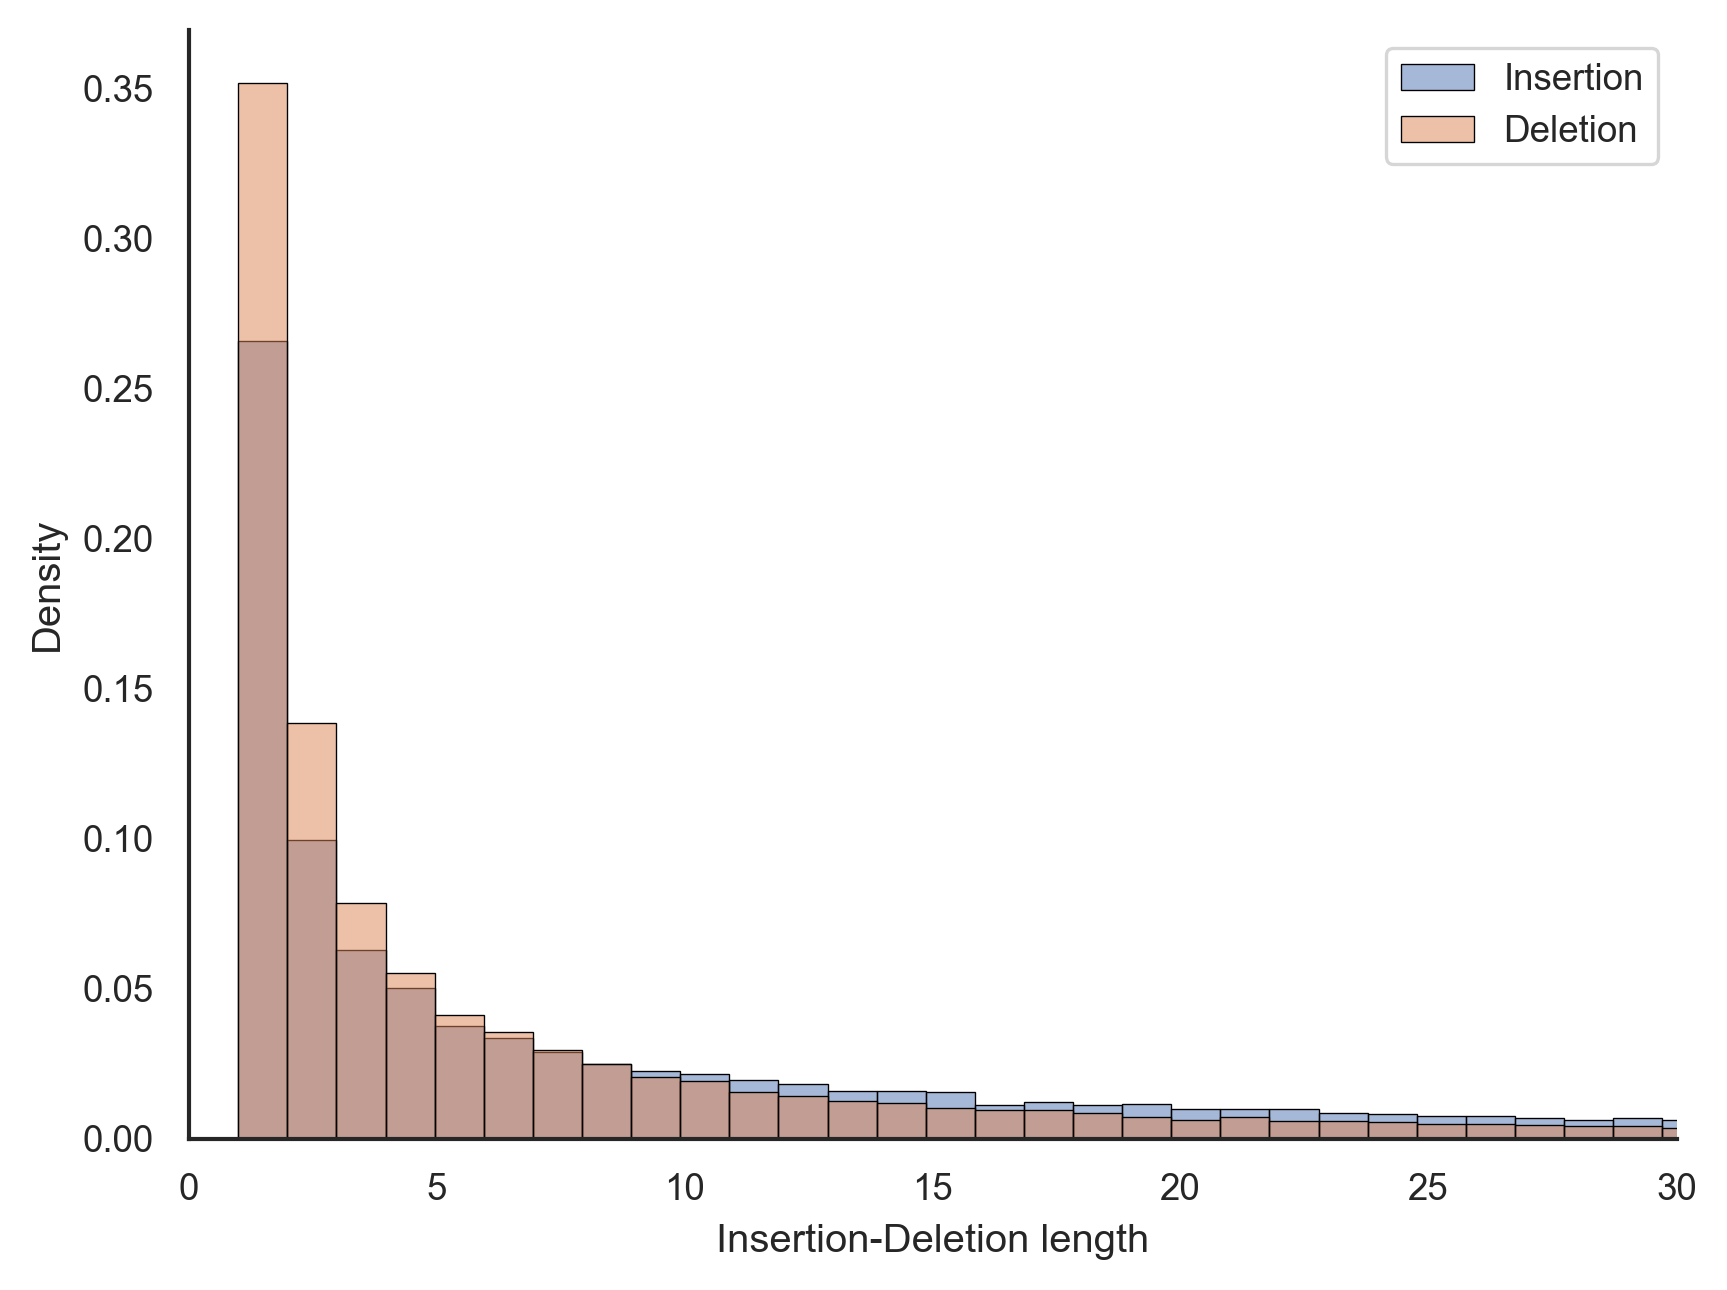

In [2]:
import json
import seaborn as sns
import matplotlib.pyplot as plt


os.chdir(path)
# Read the JSON file
with open('./mammals_data/03_deletion_length_list.json', 'r') as json_file:
    del_data = json.load(json_file)
with open('./mammals_data/03_insertion_length_list.json', 'r') as json_file:
    ins_data = json.load(json_file)
    
# Flatten the nested lists
flat_del_data = [item for sublist in del_data for item in sublist]
df_del = pd.DataFrame(flat_del_data, columns=['length'])

print(df_del.mean())

flat_ins_data = [item for sublist in ins_data for item in sublist]
df_ins = pd.DataFrame(flat_ins_data, columns=['length'])
# print(flat_data)

print(df_ins.mean())

threshold=100
filtered_df_del = df_del[df_del['length'] <= threshold]
filtered_df_ins = df_ins[df_ins['length'] <= threshold]


# Plot histogram using Seaborn
fig = sns.histplot(data=filtered_df_ins, x='length', bins=100, kde=False, alpha=0.5, color=color_1, edgecolor='black',stat='density', label="Insertion")
fig = sns.histplot(data=filtered_df_del, x='length', bins=100, kde=False, alpha=0.5, color=color_2, edgecolor='black',stat='density', label="Deletion")


fig.set(ylabel='Density', xlabel='Insertion-Deletion length')#, title='Plot of the Emperical Indel Length Distributions on Mammalian Data')
fig.set_xlim(0, 30)

sns.despine()

plt.legend() 
plt.show()